In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Dataset

In [2]:
# Load the dataset
darwin = 'data.csv'  # Update this path
darwin = pd.read_csv(darwin)

# Peek at the first few rows of the dataset
darwin.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


# Change Class P=0 and H=1

In [3]:
darwin['class'] = darwin['class'].replace({'P': 0, 'H': 1})
darwin.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,0
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,0
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,0
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,0
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,0


# Check for Missing Values (Handle If Needed)

In [4]:
# # Check for missing values in the entire DataFrame
# missing_values = darwin.isnull().sum()

# # Sum up the missing values to see if there are any in the dataset at all
# total_missing_values = missing_values.sum()

# print("Missing values in each column:\n", missing_values)
# print("\nTotal missing values in the dataset:", total_missing_values)


# Feature Scaling

In [5]:
# Scale your features excluding the target variable 'class'
features = darwin.drop(['class', 'ID'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split Data (20% Testing)

In [6]:
X = scaled_features  # Your features after scaling
y = darwin['class']  # Your target variable after encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify splits by printing shaped of training and testing sets 
print("Training set shape - X_train:", X_train.shape, " y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, " y_test:", y_test.shape)

Training set shape - X_train: (139, 450)  y_train: (139,)
Testing set shape - X_test: (35, 450)  y_test: (35,)


# Initialize and and Train the Random Forest Model

In [7]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Make Predictions and Evaluate the Model

In [8]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[17  3]
 [ 1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.82      0.93      0.87        15

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35

Accuracy Score: 0.8857142857142857


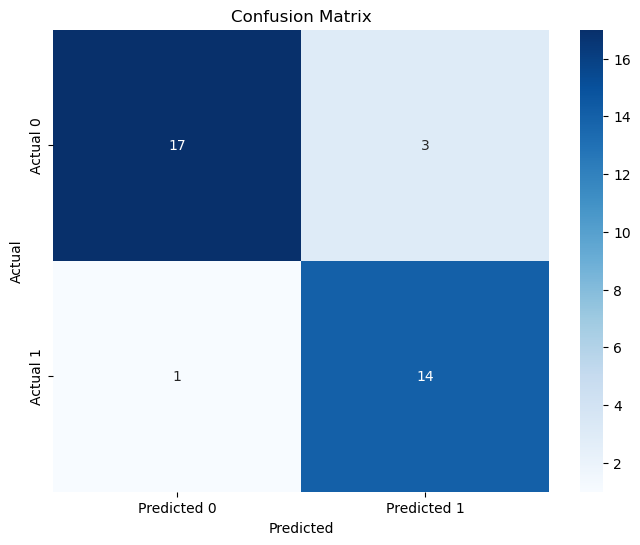

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Feature Importance

In [10]:
# Feature importances from the model
importances = rf_classifier.feature_importances_
feature_names = darwin.drop(['class', 'ID'], axis=1).columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)


# Assuming 'darwin' is your original DataFrame and 'class' is the target variable
# Ensure 'darwin' still has the column names intact
feature_names = darwin.drop(['class', 'ID'], axis=1).columns

# Now create the DataFrame using 'feature_names' for the index
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)

print(feature_importances)

                      Importance
total_time23            0.038206
total_time15            0.036744
air_time15              0.030857
total_time6             0.023561
air_time23              0.021524
...                          ...
mean_jerk_on_paper4     0.000000
mean_jerk_in_air16      0.000000
gmrt_on_paper16         0.000000
mean_speed_on_paper4    0.000000
pressure_mean16         0.000000

[450 rows x 1 columns]


In [11]:
# Sorting the feature importances
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# # Plotting
# plt.figure(figsize=(10, 8))
# sns.barplot(x=feature_importances_sorted['Importance'], y=feature_importances_sorted.index)

# plt.title('Feature Importances')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()


In [31]:
# #Increase the Plot Size and Adjust Font Sizes
# plt.figure(figsize=(12, 50))  # Significantly increase the figure size
# sns.barplot(x=feature_importances_sorted['Importance'], y=feature_importances_sorted.index)
# plt.title('Feature Importances', fontsize=16)
# plt.xlabel('Importance', fontsize=14)
# plt.ylabel('Features', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=10)
# plt.show()


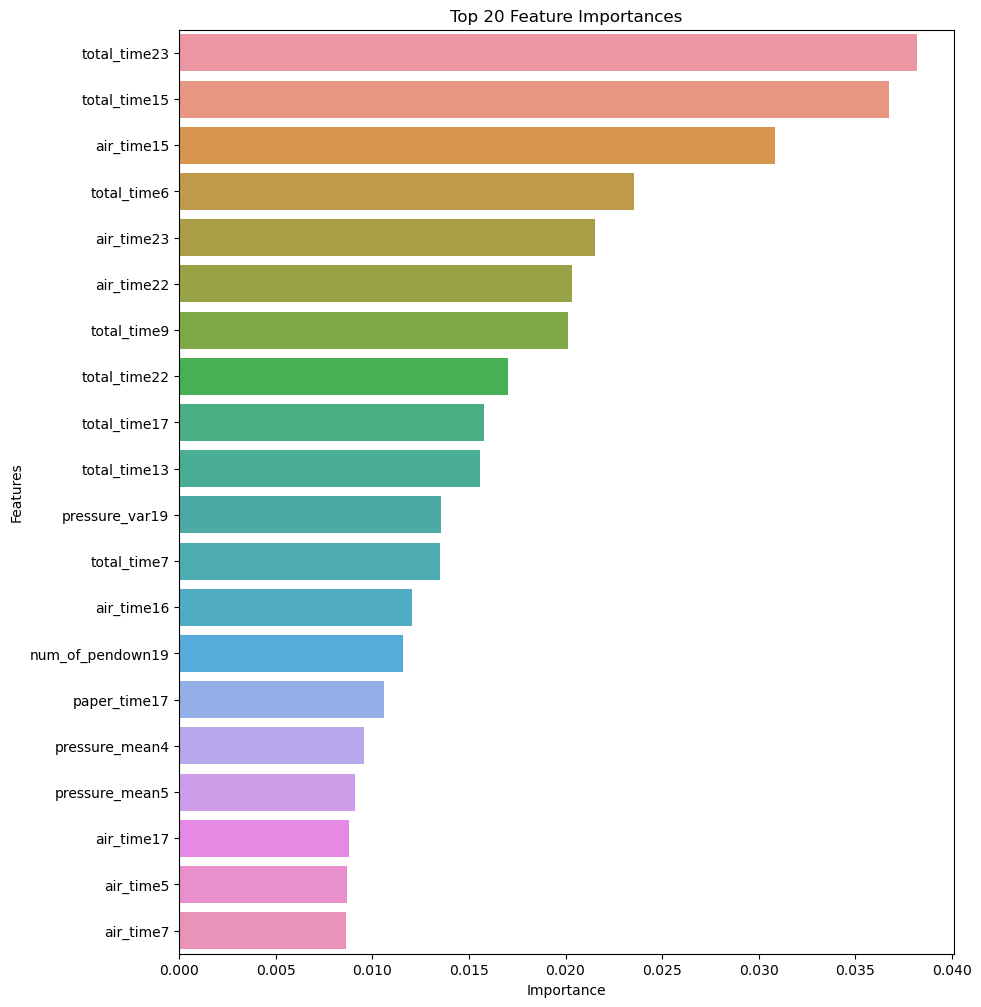

In [12]:
# Select the top 20 features for plotting
top_n = 20
top_features = feature_importances_sorted.head(top_n)

# Plotting
plt.figure(figsize=(10, 12))  # Adjust the figure size as necessary
sns.barplot(x=top_features['Importance'], y=top_features.index)
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Hyperparameter Tuning 

In [13]:
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-04-22 18:13:37,379] A new study created in memory with name: no-name-f8585c7b-1347-4ef4-9fd0-0498dd6b5a21
[I 2024-04-22 18:13:37,960] Trial 0 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 221, 'max_depth': 71, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:13:38,423] Trial 1 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 208, 'max_depth': 53, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:13:38,556] Trial 2 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 55, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:13:39,214] Trial 3 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 299, 'max_depth': 33, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with valu

[I 2024-04-22 18:13:55,314] Trial 36 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 243, 'max_depth': 83, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:13:56,225] Trial 37 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 300, 'max_depth': 52, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:13:56,555] Trial 38 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 131, 'max_depth': 33, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:13:56,722] Trial 39 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 83, 'max_depth': 57, 'min_samples_split': 3, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:13:56,979] Trial 40 finished with value: 0.8857142857142857 and paramet

[I 2024-04-22 18:14:12,927] Trial 72 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 232, 'max_depth': 79, 'min_samples_split': 5, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:14:13,501] Trial 73 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 218, 'max_depth': 74, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:14:14,046] Trial 74 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 204, 'max_depth': 90, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:14:14,541] Trial 75 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 184, 'max_depth': 82, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.8857142857142857.
[I 2024-04-22 18:14:14,811] Trial 76 finished with value: 0.8857142857142857 and par

Best trial:
  Value:  0.8857142857142857
  Params: 
    n_estimators: 221
    max_depth: 71
    min_samples_split: 6
    min_samples_leaf: 2


# Consider PCA

In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Initialize PCA and reduce the dimension to 2 components for visualization or more if necessary for modeling
pca = PCA(n_components=2)  # You can choose how many components based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check how much variance is explained by the components
print("Explained variance by component: %s" % pca.explained_variance_ratio_)


Explained variance by component: [0.12340591 0.04532734]


In [16]:
# Initialize and train the Random Forest Classifier using the PCA-transformed data
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = rf_classifier_pca.predict(X_test_pca)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))
print("Accuracy Score:", accuracy_score(y_test, y_pred_pca))


Confusion Matrix:
 [[17  3]
 [ 4 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.79      0.73      0.76        15

    accuracy                           0.80        35
   macro avg       0.80      0.79      0.79        35
weighted avg       0.80      0.80      0.80        35

Accuracy Score: 0.8


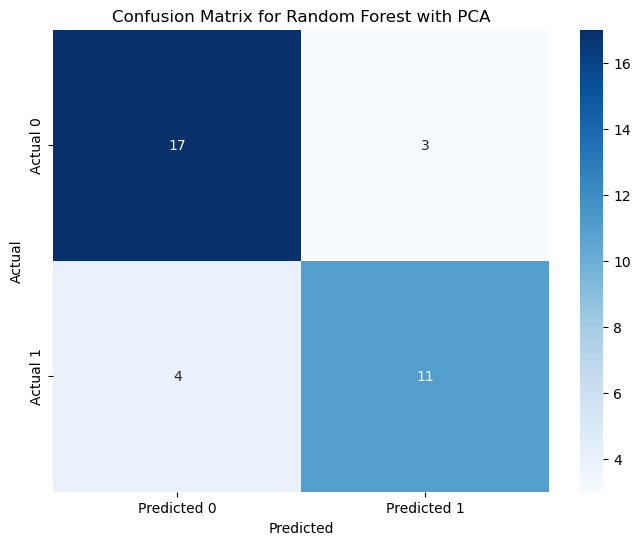

In [17]:
# Compute the confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest with PCA')
plt.show()


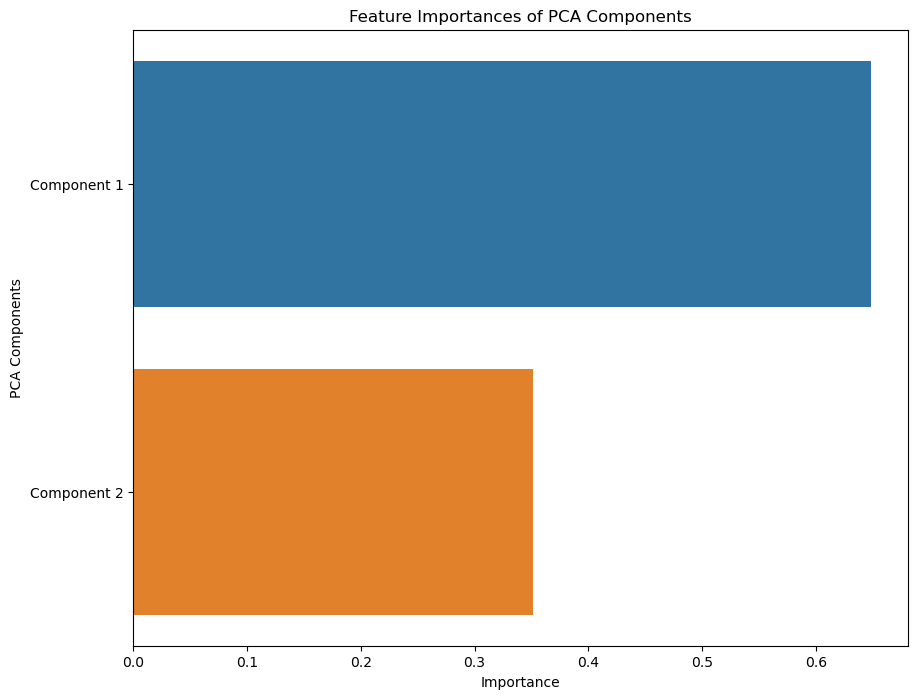

In [18]:
# Get feature importances from the PCA-based Random Forest model
importances_pca = rf_classifier_pca.feature_importances_

# Create a DataFrame to hold this information
components = ['Component %d' % (i+1) for i in range(pca.n_components)]
feature_importances_pca = pd.DataFrame(importances_pca, index=components, columns=['Importance']).sort_values('Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_pca['Importance'], y=feature_importances_pca.index)
plt.title('Feature Importances of PCA Components')
plt.xlabel('Importance')
plt.ylabel('PCA Components')
plt.show()


# Hyperparameter Tuning

In [19]:
def objective_pca(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    clf.fit(X_train_pca, y_train)
    y_pred_pca = clf.predict(X_test_pca)
    return accuracy_score(y_test, y_pred_pca)

study_pca = optuna.create_study(direction='maximize')
study_pca.optimize(objective_pca, n_trials=100)

print("Best trial (PCA):")
trial_pca = study_pca.best_trial
print("  Value: ", trial_pca.value)
print("  Params: ")
for key, value in trial_pca.params.items():
    print(f"    {key}: {value}")


[I 2024-04-22 18:15:31,560] A new study created in memory with name: no-name-fa0bafd6-29d7-441e-b172-18b228a1851f
[I 2024-04-22 18:15:31,932] Trial 0 finished with value: 0.8 and parameters: {'n_estimators': 238, 'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8.
[I 2024-04-22 18:15:32,263] Trial 1 finished with value: 0.8 and parameters: {'n_estimators': 216, 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8.
[I 2024-04-22 18:15:32,679] Trial 2 finished with value: 0.8 and parameters: {'n_estimators': 254, 'max_depth': 44, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8.
[I 2024-04-22 18:15:33,023] Trial 3 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 227, 'max_depth': 72, 'min_samples_split': 8, 'min_samples_leaf': 14}. Best is trial 3 with value: 0.8571428571428571.
[I 2024-04-22 18:15:33,372] Trial 4 finished with value: 0.857142

[I 2024-04-22 18:15:42,929] Trial 36 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 234, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 12}. Best is trial 3 with value: 0.8571428571428571.
[I 2024-04-22 18:15:43,252] Trial 37 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 118, 'max_depth': 26, 'min_samples_split': 12, 'min_samples_leaf': 14}. Best is trial 3 with value: 0.8571428571428571.
[I 2024-04-22 18:15:43,565] Trial 38 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 154, 'max_depth': 39, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 38 with value: 0.8857142857142857.
[I 2024-04-22 18:15:43,827] Trial 39 finished with value: 0.8285714285714286 and parameters: {'n_estimators': 150, 'max_depth': 42, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 38 with value: 0.8857142857142857.
[I 2024-04-22 18:15:44,071] Trial 40 finished with value: 0.8571428571428571 and p

[I 2024-04-22 18:15:53,251] Trial 72 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 138, 'max_depth': 94, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 38 with value: 0.8857142857142857.
[I 2024-04-22 18:15:53,502] Trial 73 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 112, 'max_depth': 87, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 38 with value: 0.8857142857142857.
[I 2024-04-22 18:15:53,771] Trial 74 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 166, 'max_depth': 54, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 38 with value: 0.8857142857142857.
[I 2024-04-22 18:15:54,112] Trial 75 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 155, 'max_depth': 80, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 38 with value: 0.8857142857142857.
[I 2024-04-22 18:15:54,319] Trial 76 finished with value: 0.8571428571428571 and par

Best trial (PCA):
  Value:  0.8857142857142857
  Params: 
    n_estimators: 154
    max_depth: 39
    min_samples_split: 6
    min_samples_leaf: 7
